In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from cheyette.curves import FlatCurve
from cheyette.products import PayerSwaption, PayerSwaptionAnnuity
from cheyette.processes import VasicekProcess, QuadraticAnnuityProcess
from cheyette.discretization import PeacemanRachford
from cheyette.boundary_conditions import DirichletIntrinsicBC
from cheyette.models import CheyettePDEModel, CheyetteAnalyticModel
from cheyette.pricers import CheyettePricer

plt.style.use('input/qulib.mplstyle')

# PDE vs Analytic

In [2]:
# Swaptions with small strikes are priced badly

curve = FlatCurve(short_rate=0.01)
process = VasicekProcess(mean_rev=0.01, local_vol=0.02)

expiry = 1.0
tenor = 10.0
freq = 'Ann.'
freq_to_step = {'Ann.': 1.0, 'Semi': 0.5, 'Quart.': 0.25}
underlying_times = np.arange(expiry, expiry+tenor+0.01, freq_to_step[freq])
strike = 0.01
product = PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=curve)

valuation_time = 0.0
notional = 10000.0

model_pde = CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=5, y_freq=20, t_freq=10,
                    stepping_method=PeacemanRachford(),
                    x_lower_bc=DirichletIntrinsicBC(), x_upper_bc=DirichletIntrinsicBC(),
                    y_lower_bc=DirichletIntrinsicBC(), y_upper_bc=DirichletIntrinsicBC())
model_analytic = CheyetteAnalyticModel()

pricer_pde = CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)

pv_pde = pricer_pde.price()['PV']*notional
pv_analytic = pricer_analytic.price()['PV']*notional

print('Forward Swap Rate:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

Forward Swap Rate: 0.01
PV PDE: 716.942951475514
PV Analytic: 717.2405366448545
Abs. Error: -0.29758516934055024


In [3]:
short_rates = np.arange(-0.05, 0.0501, 0.0025)
curves = [FlatCurve(r) for r in short_rates]
products = [PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=x) for x in curves]

pvs_curve_pde = [pricer_pde.set('curve', x).set('product', y).price()['PV']*notional for x, y in zip(curves, products)]
pvs_curve_analytic = [pricer_analytic.set('curve', x).price()['PV']*notional for x in curves]

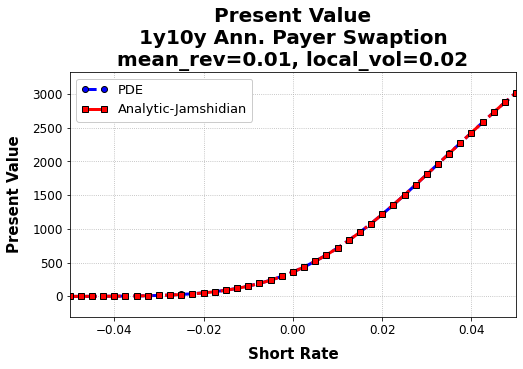

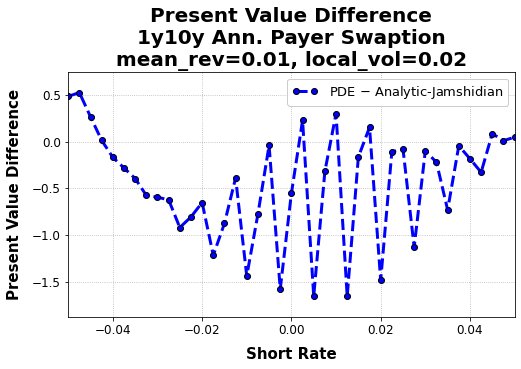

In [4]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()

In [5]:
curve = FlatCurve(short_rate=0.01)
process = VasicekProcess(mean_rev=0.01, local_vol=0.02)

expiry = 10.0
tenor = 1.0
freq = 'Ann.'
freq_to_step = {'Ann.': 1.0, 'Semi': 0.5, 'Quart.': 0.25}
underlying_times = np.arange(expiry, expiry+tenor+0.01, freq_to_step[freq])
strike = 0.01
product = PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=curve)

valuation_time = 0.0
notional = 10000.0

model_pde = CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=2.0,
                    x_freq=5, y_freq=20, t_freq=10,
                    stepping_method=PeacemanRachford(),
                    x_lower_bc=DirichletIntrinsicBC(), x_upper_bc=DirichletIntrinsicBC(),
                    y_lower_bc=DirichletIntrinsicBC(), y_upper_bc=DirichletIntrinsicBC())
model_analytic = CheyetteAnalyticModel()
PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=curve)
pricer_pde = CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)

pv_pde = pricer_pde.price()['PV']*notional
pv_analytic = pricer_analytic.price()['PV']*notional

print('Forward Swap Rate:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

Forward Swap Rate: 0.010050167084168027
PV PDE: 216.0214854929282
PV Analytic: 216.23071872644965
Abs. Error: -0.20923323352144507


In [6]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [FlatCurve(r) for r in short_rates]
products = [PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=x) for x in curves]

pvs_curve_pde = [pricer_pde.set('curve', x).set('product', y).price()['PV']*notional for x, y in zip(curves, products)]
pvs_curve_analytic = [pricer_analytic.set('curve', x).price()['PV']*notional for x in curves]

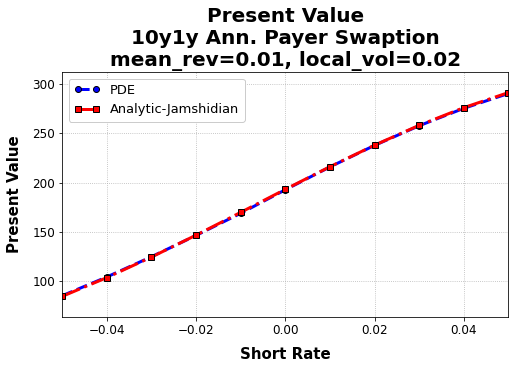

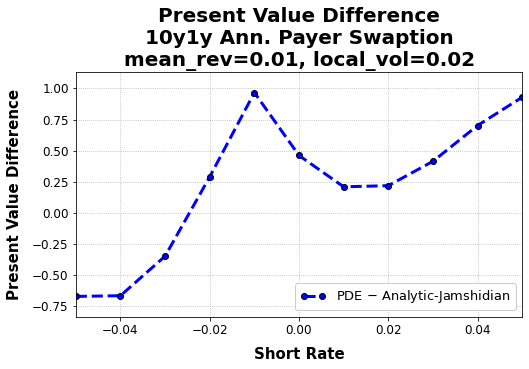

In [7]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()

In [8]:
import cProfile
from time import time

curve = FlatCurve(short_rate=0.01)
process = VasicekProcess(mean_rev=0.01, local_vol=0.02)

expiry = 10.0
tenor = 10.0
freq = 'Ann.'
freq_to_step = {'Ann.': 1.0, 'Semi': 0.5, 'Quart.': 0.25}
underlying_times = np.arange(expiry, expiry+tenor+0.01, freq_to_step[freq])
strike = 0.01
product = PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=curve)

valuation_time = 0.0
notional = 10000.0

model_pde = CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=30, y_freq=30, t_freq=10,
                    stepping_method=PeacemanRachford(),
                    x_lower_bc=DirichletIntrinsicBC(), x_upper_bc=DirichletIntrinsicBC(),
                    y_lower_bc=DirichletIntrinsicBC(), y_upper_bc=DirichletIntrinsicBC())
model_analytic = CheyetteAnalyticModel()

pricer_pde = CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_analytic = CheyettePricer(model_analytic, curve, process, product, valuation_time=valuation_time)


start = time()
#cProfile.run("pv_pde = pricer_pde.price()['PV']*notional", sort='tottime')
pv_pde = pricer_pde.price()['PV']*notional
print('Elapsed: ', time() - start)

pv_analytic = pricer_analytic.price()['PV']*notional

print('Forward Swap Rate:', strike)
print(f'PV PDE: {pv_pde}')
print(f'PV Analytic: {pv_analytic}')
print(f'Abs. Error: {pv_pde - pv_analytic}')

# Boundary conditions are computationally expensive

x_steps = 2 * model_pde.x_freq * model_pde.x_grid_stddevs
y_steps = 2 * model_pde.y_freq * model_pde.y_grid_stddevs
t_steps = product.expiry * model_pde.t_freq
print('\nGridSize')
print(f' x_steps: {x_steps}')
print(f' y_steps: {y_steps}')
print(f' t_steps: {t_steps}')
print(f'--------')
print(f' nodes: {x_steps*y_steps*t_steps:.1e}')

Elapsed:  1.713050365447998
Forward Swap Rate: 0.010050167084168055
PV PDE: 1952.8002096882317
PV Analytic: 1953.7230129483312
Abs. Error: -0.9228032600994993

GridSize
 x_steps: 180.0
 y_steps: 60.0
 t_steps: 100.0
--------
 nodes: 1.1e+06


In [9]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [FlatCurve(r) for r in short_rates]
products = [PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times, curve=x) for x in curves]

pvs_curve_pde = [pricer_pde.set('curve', x).set('product', y).price()['PV']*notional for x, y in zip(curves, products)]
pvs_curve_analytic = [pricer_analytic.set('curve', x).price()['PV']*notional for x in curves]

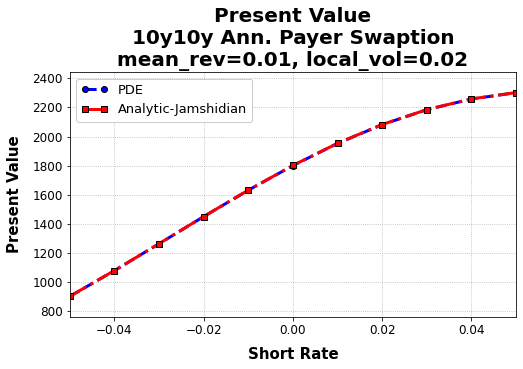

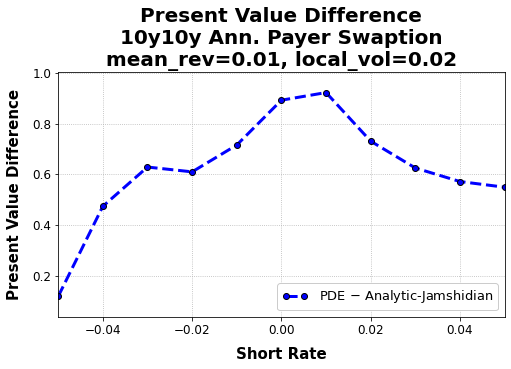

In [10]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve_pde, label='PDE')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve_pde, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic-Jamshidian')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={process.mean_rev}, local_vol={process.local_vol}')
ax.legend()

# Annuity Approximation

In [13]:
curve = FlatCurve(short_rate=0.01)
mean_rev = 0.01
local_vol = 0.02
process = VasicekProcess(mean_rev=mean_rev, local_vol=local_vol)
process_annuity = QuadraticAnnuityProcess(mean_rev=mean_rev, a=local_vol, b=0.00, c=0.00)

model_pde = CheyettePDEModel(x_grid_stddevs=5.0, y_grid_stddevs=5.0,
                    x_freq=3, y_freq=3, t_freq=1,
                    stepping_method=PeacemanRachford(),
                    x_lower_bc=DirichletIntrinsicBC(), x_upper_bc=DirichletIntrinsicBC(),
                    y_lower_bc=DirichletIntrinsicBC(), y_upper_bc=DirichletIntrinsicBC())

expiry = 10.0
tenor = 10.0
freq = 'Ann.'
freq_to_step = {'Ann.': 1.0, 'Semi': 0.5, 'Quart.': 0.25}
underlying_times = np.arange(expiry, expiry+tenor+0.01, freq_to_step[freq])
strike = curve.swap_rate(underlying_times)
product = PayerSwaption(strike=strike, expiry=expiry, underlying_times=underlying_times)
product_annuity = PayerSwaptionAnnuity(strike=strike, expiry=expiry, underlying_times=underlying_times,
                                  curve=curve, process=process_annuity)

valuation_time = 0.0
pricer = CheyettePricer(model_pde, curve, process, product, valuation_time=valuation_time)
pricer_annuity = CheyettePricer(model_pde, curve, process_annuity, product_annuity, valuation_time=valuation_time)

notional = 10000.0

pv = pricer.price()['PV']*notional
pv_annuity = pricer_annuity.price()['PV']*notional

print(f'PV: {pv}')
print(f'PV Annuity: {pv_annuity}')
print(f'Abs. Error: {pv - pv_annuity}')

PV: 1913.5719196269968
PV Annuity: 1958.43727922672
Abs. Error: -44.865359599723206


# Curve Shifts

In [14]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [FlatCurve(r) for r in short_rates]
products_annuity = [PayerSwaptionAnnuity(strike, expiry, underlying_times, x, process_annuity) for x in curves]

pvs_curve = [pricer.set('curve', x).price()['PV']*notional for x in curves]
pvs_curve_annuity = [pricer_annuity.set('curve', x).set('product', y).price()['PV']*notional 
                     for x, y in zip(curves, products_annuity)]

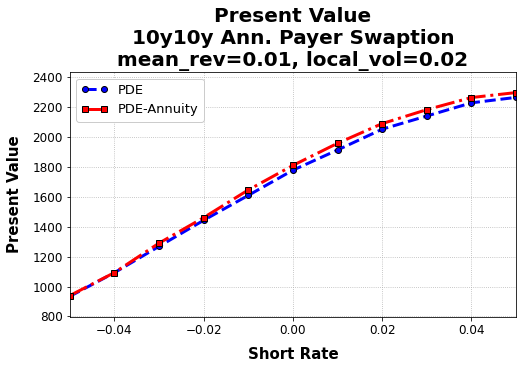

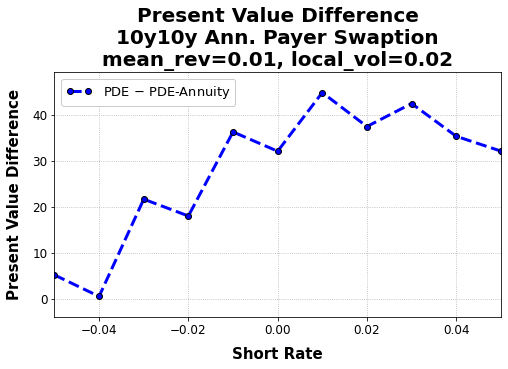

In [15]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve, label='PDE')
ax.plot(short_rates, pvs_curve_annuity, label='PDE-Annuity')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve, pvs_curve_annuity)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ PDE-Annuity')
ax.set_xlabel('Short Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()

# Vol Shifts

In [16]:
mults = np.arange(-0.9, 2.1, 0.1)
default_vol = 0.02
processes = [VasicekProcess(mean_rev=0.01, local_vol=(1 + m) * default_vol) for m in mults]
processes_annuity = [QuadraticAnnuityProcess(mean_rev=0.01, a=(1 + m) * default_vol, b=0.00, c=0.00) for m in mults]
products_annuity = [PayerSwaptionAnnuity(strike, expiry, underlying_times, curve, y) for y in processes_annuity]

pvs_vols = [pricer.set('process', x).price()['PV']*notional for x in processes]
pvs_vols_annuity = [pricer_annuity.set('process', x).price()['PV']*notional for x in processes_annuity]

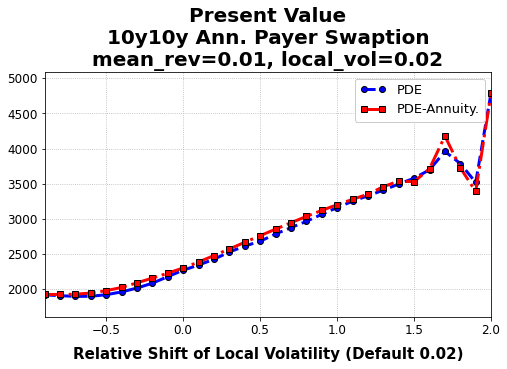

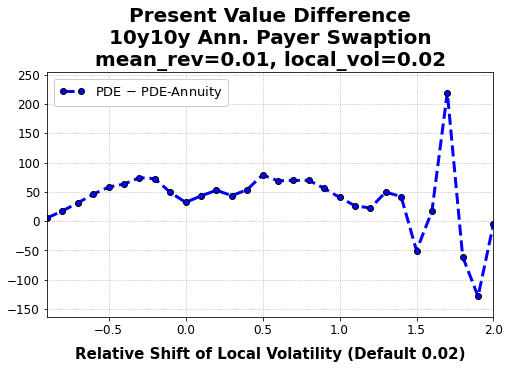

In [17]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(mults, pvs_vols, label='PDE')
ax.plot(mults, pvs_vols_annuity, label='PDE-Annuity.')
ax.set_xlabel(f'Relative Shift of Local Volatility (Default {default_vol})')
ax.set_title('Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()

diff = [y - x for x, y in zip(pvs_vols, pvs_vols_annuity)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(mults, diff, label='PDE $-$ PDE-Annuity')
ax.set_xlabel(f'Relative Shift of Local Volatility (Default {default_vol})')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y {freq} Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()